# Correlation
Correlation feature selection evaluates subsets of features on the basis of the following hypothesis: **"Good feature subsets contains features highly correlated with the target, yet uncorrelated to each other"**. 
* Correlation is a measure of the linear relationship of 2 or more variables
* Through correlation, we can predict one variable from the other
    * Good variables are highly correlated with the target
* Correlated predictor variables provide redundant information
    * Variables should be correlated with the target but uncorrelated among themselves
    
The most familiar method widely used to measure correlation is **Pearson's Correlation Coefficient**
* 1 is highly correlated
* -1 is highly anti-correlated

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.datasets import load_boston
data = load_boston()

dir(data)

df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = pd.DataFrame(data.target, columns=['target'])

In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [29]:
df.shape

(506, 14)

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

<AxesSubplot:>

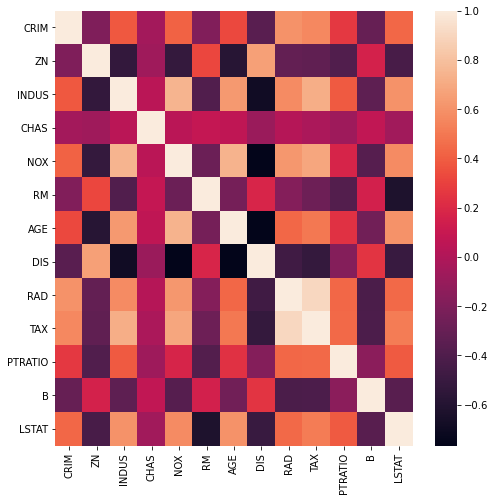

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(X_train.corr())

### Brute Force Approach

In [37]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8) #drops features with correlation of 0.8 above
print('correlated features: ', len(set(corr_features)) )

correlated features:  1


In [38]:
corr_features

{'TAX'}

In [39]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((354, 12), (152, 12))

### Second Approach

In [40]:
df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = pd.DataFrame(data.target, columns=['target'])

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))